# EV Vehicle Demand Prediction - Data Exploration
## Week 1: Understanding the Dataset

This notebook contains comprehensive exploratory data analysis (EDA) of the EV dataset.

In [5]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set style for visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')

print('Libraries imported successfully!')

Libraries imported successfully!


In [6]:
# Load the dataset
df = pd.read_csv('../data/raw/EV DATASET.csv')

print('Dataset Shape:', df.shape)
print('\nColumn Names:')
print(df.columns.tolist())

Dataset Shape: (20819, 10)

Column Names:
['Date', 'County', 'State', 'Vehicle Primary Use', 'Battery Electric Vehicles (BEVs)', 'Plug-In Hybrid Electric Vehicles (PHEVs)', 'Electric Vehicle (EV) Total', 'Non-Electric Vehicle Total', 'Total Vehicles', 'Percent Electric Vehicles']


In [7]:
# Display basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20819 entries, 0 to 20818
Data columns (total 10 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Date                                      20819 non-null  object 
 1   County                                    20733 non-null  object 
 2   State                                     20733 non-null  object 
 3   Vehicle Primary Use                       20819 non-null  object 
 4   Battery Electric Vehicles (BEVs)          20819 non-null  object 
 5   Plug-In Hybrid Electric Vehicles (PHEVs)  20819 non-null  object 
 6   Electric Vehicle (EV) Total               20819 non-null  object 
 7   Non-Electric Vehicle Total                20819 non-null  object 
 8   Total Vehicles                            20819 non-null  object 
 9   Percent Electric Vehicles                 20819 non-null  float64
dtypes: float64(1), object(9)
memory us

In [8]:
# First few rows
df.head()

,Date,County,State,Vehicle Primary Use,Battery Electric Vehicles (BEVs),Plug-In Hybrid Electric Vehicles (PHEVs),Electric Vehicle (EV) Total,Non-Electric Vehicle Total,Total Vehicles,Percent Electric Vehicles
0,September 30 2022,Riverside,CA,Passenger,7,0,7,460,467,1.50
1,December 31 2022,Prince William,VA,Passenger,1,2,3,188,191,1.57
2,January 31 2020,Dakota,MN,Passenger,0,1,1,32,33,3.03
3,June 30 2022,Ferry,WA,Truck,0,0,0,"3,575","3,575",0.00
4,July 31 2021,Douglas,CO,Passenger,0,1,1,83,84,1.19


In [9]:
# Basic statistics
df.describe()

,Percent Electric Vehicles
count,20819.000000
mean,4.139216
std,11.055350
min,0.000000
25%,0.390000
50%,1.220000
75%,2.995000
max,100.000000


In [10]:
# Check for missing values
print('Missing Values:')
print(df.isnull().sum())

Missing Values:
Date                                         0
County                                      86
State                                       86
Vehicle Primary Use                          0
Battery Electric Vehicles (BEVs)             0
Plug-In Hybrid Electric Vehicles (PHEVs)     0
Electric Vehicle (EV) Total                  0
Non-Electric Vehicle Total                   0
Total Vehicles                               0
Percent Electric Vehicles                    0
dtype: int64


## Data Cleaning and Type Conversion

In [14]:
# Convert date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Convert string numbers with commas to numeric
numeric_columns = ['Battery Electric Vehicles (BEVs)', 
                   'Plug-In Hybrid Electric Vehicles (PHEVs)',
                   'Electric Vehicle (EV) Total', 
                   'Non-Electric Vehicle Total',
                   'Total Vehicles']

for col in numeric_columns:
    df[col] = pd.to_numeric(df[col].astype(str).str.replace(',', ''), errors='coerce')

print('Data types after conversion:')
print(df.dtypes)

Data types after conversion:
Date                                        datetime64[ns]
County                                              object
State                                               object
Vehicle Primary Use                                 object
Battery Electric Vehicles (BEVs)                     int64
Plug-In Hybrid Electric Vehicles (PHEVs)             int64
Electric Vehicle (EV) Total                          int64
Non-Electric Vehicle Total                           int64
Total Vehicles                                       int64
Percent Electric Vehicles                          float64
Year                                                 int32
Month                                                int32
Quarter                                              int32
YearMonth                                        period[M]
Season                                              object
dtype: object


## Feature Engineering

In [15]:
# Extract time-based features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Quarter'] = df['Date'].dt.quarter
df['YearMonth'] = df['Date'].dt.to_period('M')

# Create season
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df['Season'] = df['Month'].apply(get_season)

print('New features created successfully!')

New features created successfully!


## Exploratory Data Analysis

In [16]:
# Add more analysis cells here as you explore the data

In [17]:
plt.figure(figsize=(15,6))

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

<Axes: >

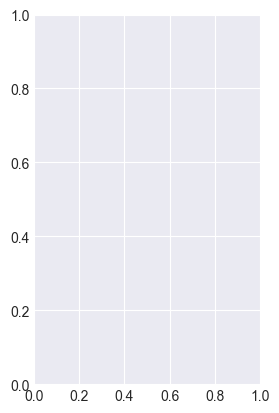

In [18]:
plt.subplot(1,2,1)